In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


In [ ]:
# Generate 10 points between 0 and 1
points1 = np.random.rand(10, 2)

# Generate 10 points between 4 and 5
points2 = np.random.uniform(low=[3, 3], high=[5, 5], size=(10, 2))

# Combine the two sets of points into one array
data = np.concatenate((points1, points2), axis=0)


In [ ]:
kmeans = KMeans(n_clusters=2)


In [ ]:
kmeans.fit(data)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [ ]:
centroids = kmeans.cluster_centers_
labels = kmeans.labels_
print("Centroids:")
print(centroids)
print("Labels:")
print(labels)


Centroids:
[[0.57818262 0.57539329]
 [4.18064222 4.08331482]]
Labels:
[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]


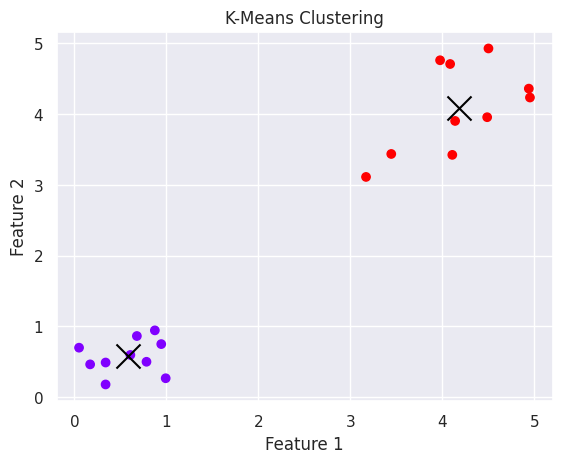

In [ ]:
# Plotting the data points
plt.scatter(data[:, 0], data[:, 1], c=kmeans.labels_, cmap='rainbow')

# Plotting the centroids of the clusters
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='black', marker='x')

# Adding titles and labels
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Show the plot
plt.show()


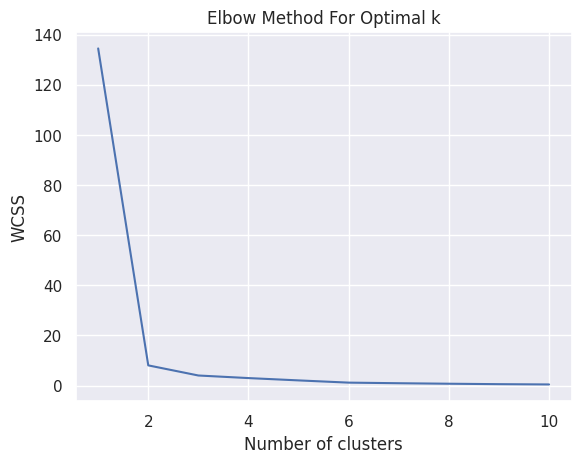

In [ ]:
wcss = []
for i in range(1, 11):  # Test up to 10 clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

# Plotting the results onto a line graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Within-cluster sum of squares
plt.show()


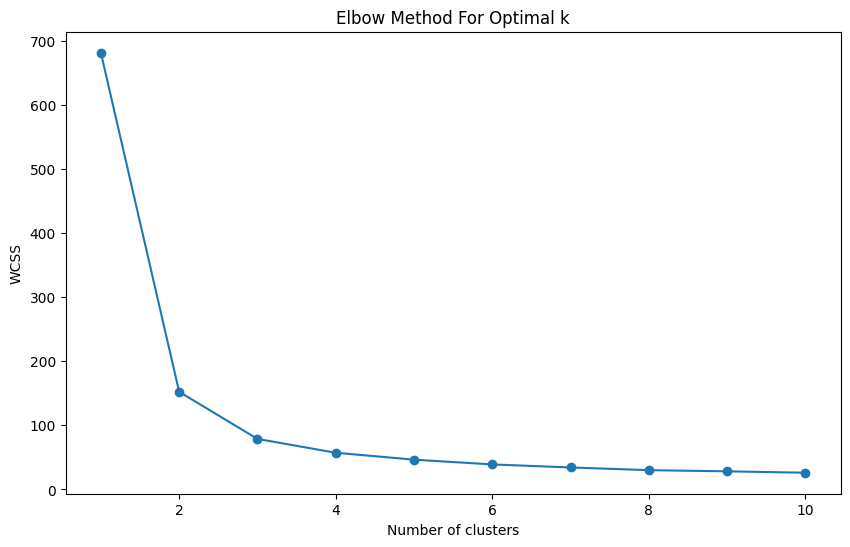

In [3]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X = iris.data

# List to store the within-cluster sum of squares (WCSS)
wcss = []

# Range of clusters to try (for example, 1 to 10)
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # Inertia: Sum of distances of samples to their closest cluster center

# Plotting the results onto a line graph to observe the 'elbow'
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Within-cluster sum of squares
plt.show()

# The "elbow" in the plot is where the WCSS starts to decrease more slowly


##<font color='Yellow'>Interpreting the results of the elbow method to infer the optimal number of clusters involves analyzing the plot of the within-cluster sum of squares (WCSS) against the number of clusters. The WCSS is a measure of the variance within each cluster, and the goal of k-means clustering is to minimize this value. However, reducing the WCSS too much can lead to overfitting, where each data point essentially becomes its own cluster.

##<b><font color='red'>Here's how to interpret the results:<b>

###<font color='green'>Plot the WCSS </font>: After running the k-means algorithm for a range of cluster numbers (e.g., 1 to 10), plot the WCSS for each number of clusters. The WCSS is typically plotted on the y-axis, and the number of clusters is plotted on the x-axis.

###<font color='green'>Look for the Elbow Point </font>: The "elbow" point on the plot is where the rate of decrease in WCSS with respect to the number of clusters significantly slows down. This point represents a balance between minimizing the WCSS and avoiding overfitting by not having too many clusters.

###<b><font color='Red'>Elbow Point Characteristics:</b>

####Before the elbow point, adding more clusters significantly decreases the WCSS, indicating that each cluster is capturing a substantial amount of variance in the data.

####After the elbow point, the reductions in WCSS become marginal for each additional cluster, suggesting that the data points are being divided into too many small, and potentially meaningless, clusters.

####Optimal Number of Clusters: The optimal number of clusters is typically chosen at the elbow point. This is because clusters added beyond this point do not contribute significantly to explaining the variance in the data, and thus might not be meaningful.

###<font color='red'>Example Interpretation

####If the plot shows a clear elbow at, say, 4 clusters, where the WCSS graph bends and then flattens out, this indicates that increasing the number of clusters beyond 4 does not provide substantial improvement in the model. Thus, 4 would be considered the optimal number of clusters.

###Considerations

####<font color='green'>Subjectivity</font>: The identification of the elbow point can sometimes be subjective, especially if the curve is smooth. In such cases, domain knowledge and additional cluster validation metrics (like the silhouette score) can help in deciding the optimal number.

####<font color='green'>Absence of a Clear Elbow</font>: In some datasets, there might not be a clear elbow. When this happens, it could indicate that the data is not inherently clustered, or that k-means might not be the best model for the data. Alternative clustering methods or additional metrics might be necessary to determine the best number of clusters.